In [1]:
import pathlib, sys
sys.path.append('../scripts')
import pdff_kinematic_sim_funcs as pdff_sim
import numpy as np
import roboticstoolbox as rtb

DHRobot: Braccio, 5 joints (RRRRR), dynamics, geometry, standard DH parameters
┏━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃  aⱼ   ┃   ⍺ⱼ   ┃  q⁻   ┃   q⁺   ┃
┣━━━━╋━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.071 ┃     0 ┃  90.0° ┃  0.0° ┃ 180.0° ┃
┃ q2 ┃     0 ┃ 0.125 ┃   0.0° ┃ 15.0° ┃ 165.0° ┃
┃ q3 ┃     0 ┃ 0.125 ┃   0.0° ┃  0.0° ┃ 180.0° ┃
┃ q4 ┃     0 ┃     0 ┃ -90.0° ┃  0.0° ┃ 180.0° ┃
┃ q5 ┃ 0.195 ┃     0 ┃   0.0° ┃  0.0° ┃ 180.0° ┃
┗━━━━┻━━━━━━━┻━━━━━━━┻━━━━━━━━┻━━━━━━━┻━━━━━━━━┛

┌─────┬──────┬──────┬───────┬───────┬──────┐
│name │ q0   │ q1   │ q2    │ q3    │ q4   │
├─────┼──────┼──────┼───────┼───────┼──────┤
│  qz │  0°  │  0°  │  0°   │  0°   │  0°  │
│  qr │  90° │  45° │  180° │  180° │  90° │
└─────┴──────┴──────┴───────┴───────┴──────┘



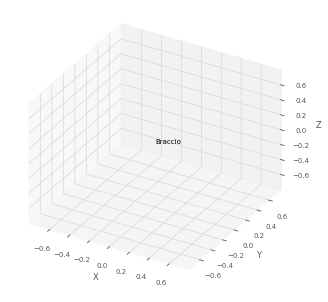

[0.25  0.    0.266]
[0.25  0.    0.266]


<Figure size 432x288 with 0 Axes>

In [2]:
# TODO: instead of adding qlim here, add clamping to get_traj function and take qlims as an input
braccio = pdff_sim.RobotArm3D(
                "Braccio", 
                [
                    rtb.RevoluteDH(a=0, d=0.071, alpha=np.pi/2, qlim=[0, np.pi]),
                    rtb.RevoluteDH(a=0.125, d=0, alpha=0, qlim=[0.2618, 2.8798]),
                    rtb.RevoluteDH(a=0.125, d=0, alpha=0, qlim=[0, np.pi]),
                    rtb.RevoluteDH(a=0, d=0, alpha=-np.pi/2, qlim=[0, np.pi]),
                    rtb.RevoluteDH(a=0, d=0.195, alpha=0, qlim=[0, np.pi])
                ], 
                np.array([0, 0, 0, 0, 0]), #qz
                np.array([np.pi/2, np.pi/4, np.pi, np.pi, np.pi/2]), # qr
                rtb.rtb_path_to_datafile("../stl/", local=True)
                            )
print(braccio)
braccio.plot(q=braccio.qz)
print(braccio.fkine(braccio.qz).t)
print(braccio.forward_kinematics(braccio.qz))

In [3]:
x_target = np.array([0.2, -0.15, 0.25])
init_condit = [np.array([np.pi/8, np.pi/4, np.pi/5, 0, 0]), np.array([0, 0, 0, 0, 0])]
Theta_opt, iters, JHist = pdff_sim.gen_theta(x_target, init_condit, braccio)

######################### PIBB Algorithm Started #########################
######################### PIBB Algorithm Finished. Time Elapsed : 22.868980169296265 #########################


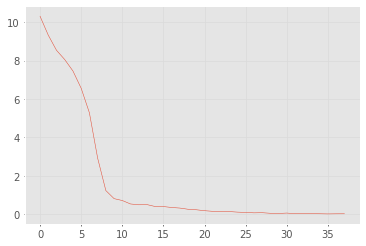

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(JHist)